# Loan Classification Problem
Loan approval prediction. Generally, it involves the lender looking at various background information about the applicant, and deciding whether the bank should grant the loan. Parameters like credit score, loan amount, lifestyle, career, and assets are the deciding factors in getting the loan approved. If, in the past, people with parameters similar to yours have paid their dues timely, it is more likely that your loan would be granted as well.

<br>

## Table of Content
- [ 1 - Packages ](#1)
- [ 2 - Understanding the data](#2)
  - [ 2.1 Loading and visualizing the data](#2.1)
- [ 3 - Data preprocessing](#3)
  - [ 3.1 Problem of missing values](#3.1)
  - [ 3.2 Feature transformation](#3.2)
- [ 4 - Models Implementation](#4)
  - [ 4.1 ](#4.1)
  - [ 4.2 ](#4.2)
  - [ 4.3 ](#4.3)
  - [ 4.4 ](#4.4)
  - [ 4.5 ](#4.5)
- [ 5 - Evaluating the Models](#5)
- [ 6 - Conclusion](#6)


<a id="1"></a>
## 1 - Packages

First, Let's import all the packages that we will need during this project

- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org) is a famous package for data analysis and manipulation tool in Python.
- [matplotlib](https://matplotlib.org) is a famous library to plot graphs in Python.
- [seaborn](https://seaborn.pydata.org) is a famous Python data visualization library based on matplotlib.
- [sklearn](https://scikit-learn.org) is a wide-used, simple and efficient tool for predictive data analysis in Python.
- [xgboost](https://xgboost.readthedocs.io) is an optimized distributed gradient boosting library that implements machine learning algorithms in Python.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,classification_report

<a id="2"></a>
## 2 - Understanding the data

The data is collected from *//* which address the attributes of many applicants and the state of the loan.
<br>
<a id="2.1"></a>
### 2.1 Loading and visualizing the data

In [79]:
#Read data
df = pd.read_csv("assets/data.csv")

#### View the features
Let's get more familiar with the dataset.

In [80]:
#preview data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id="2.2"></a>
### 2.2 Understanding the dataset features
##### Displaying information about the features

In [81]:
#Preview data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### The meaning of the features

<a id="3"></a>
## 3 - Data preprocessing
Data preprocessing is used to transform the raw data in a useful and efficient format by cleaning the data, transform it and reduction it and  so on.
<br>

<a id="3.1"></a>
### 3.1 Data Cleaning
First, let's check whether the data have missing values or not.

In [82]:
#Preview data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [83]:
#Check missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Therefor, the features `Gender`, `Married`, `Dependents`, `Self-Employed`, `LoanAmount`, `Loan_Amount_Term` and `Credit_History` have missing values.

- Let's fix them one by one.

#### Gender - Missing Value

In [84]:
# percent of missing "Gender"
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))
# %s specifically is used to perform concatenation of strings together.
print("Number of people who take a loan group by gender :")
print(df['Gender'].value_counts())

Percent of missing "Gender" records is 2.12%
Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


##### Visualizing Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

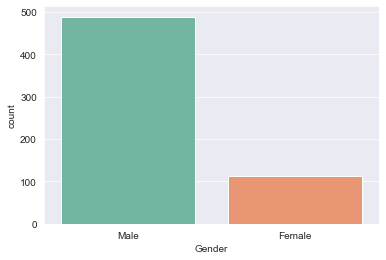

In [85]:
#visuals
df['Gender'].value_counts().plot.bar(rot=0)
sns.countplot(x='Gender', data=df, palette = 'Set2')

#### Married - Missing Value

In [86]:
# percent of missing "Married"
print('Percent of missing "Married" records is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by marital status :")
print(df['Married'].value_counts())

Percent of missing "Married" records is 0.49%
Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


##### Visualizing Married

<AxesSubplot:>

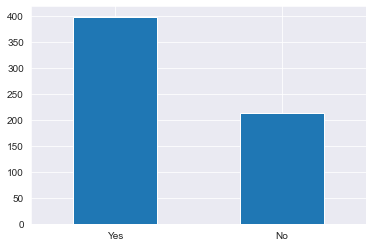

In [87]:
#visuals
df['Married'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Married', ylabel='count'>

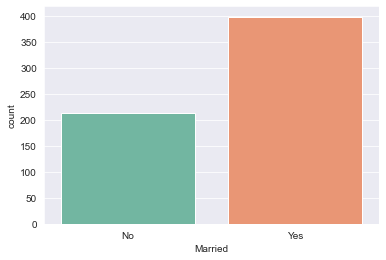

In [88]:
sns.countplot(x='Married', data=df, palette = 'Set2')

#### Dependents - Missing Value

In [89]:
# percent of missing "Dependents"
print('Percent of missing "Dependents" records is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by dependents :")
print(df['Dependents'].value_counts())

Percent of missing "Dependents" records is 2.44%
Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


##### Visualizing Dependents

<AxesSubplot:>

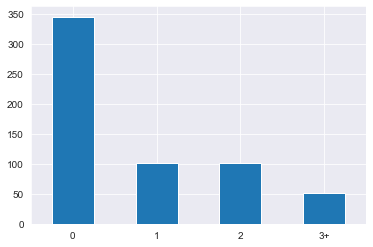

In [90]:
#visuals
df['Dependents'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

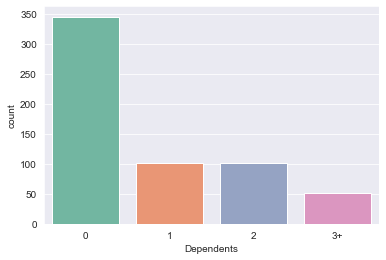

In [91]:
sns.countplot(x='Dependents', data=df, palette = 'Set2')

#### Education - Missing Value

In [92]:
# percent of missing "Education"
print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Education'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by Education :")
print(df['Education'].value_counts())

Percent of missing "Self_Employed" records is 0.00%
Number of people who take a loan group by Education :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


##### Visualizing Education

<AxesSubplot:>

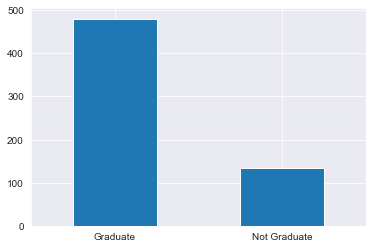

In [93]:
#visuals
df['Education'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Education', ylabel='count'>

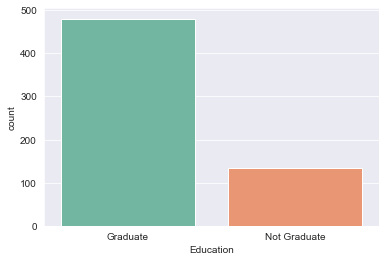

In [94]:
sns.countplot(x='Education', data=df, palette = 'Set2')

#### Self Employed - Missing Value

In [95]:
# percent of missing "Self_Employed"
print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by self employed :")
print(df['Self_Employed'].value_counts())

Percent of missing "Self_Employed" records is 5.21%
Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


##### Visualizing Self Employed

<AxesSubplot:>

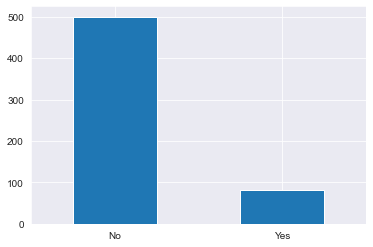

In [96]:
#visuals
df['Self_Employed'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

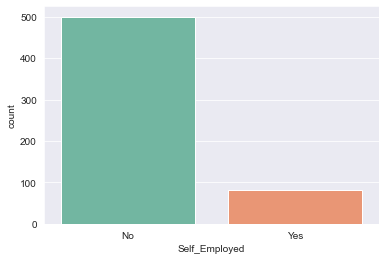

In [97]:
sns.countplot(x='Self_Employed', data=df, palette = 'Set2')

#### Loan Amount - Missing Value

In [98]:
# percent of missing "LoanAmount"
print('Percent of missing "LoanAmount" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


##### Visualizing Loan Amount

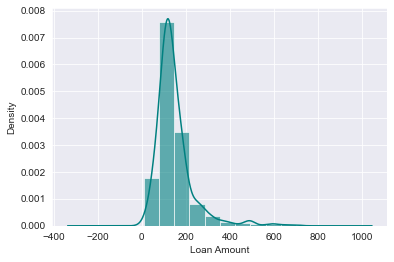

In [99]:
#visuals
ax = df["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
df["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

#### Loan Amount Term - Missing Value

In [100]:
# percent of missing "Loan_Amount_Term"
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by loan amount term :")
print(df['Loan_Amount_Term'].value_counts())

Percent of missing "Loan_Amount_Term" records is 2.28%
Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


##### Visualizing Loan Amount Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

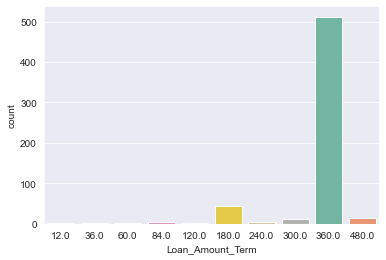

In [101]:
#visuals
sns.countplot(x='Loan_Amount_Term', data=df, palette = 'Set2')

<AxesSubplot:ylabel='LoanAmount'>

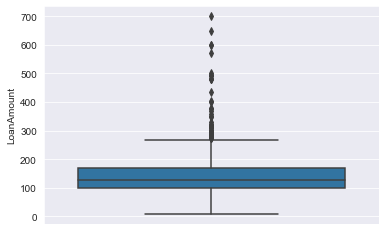

In [102]:
#the loan amount is skewed
df['LoanAmount'].median()
df['LoanAmount'].mode()
sns.boxplot(y='LoanAmount',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

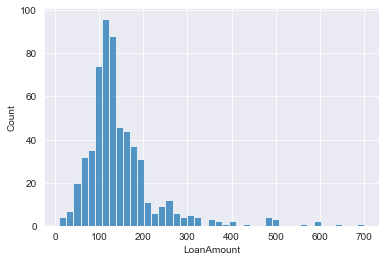

In [103]:
sns.histplot(data=df,x='LoanAmount', palette = 'Set2')

#### Credit History - Missing Value

In [104]:
# percent of missing "Credit_History"
print('Percent of missing "Credit_History" records is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by credit history :")
print(df['Credit_History'].value_counts())

Percent of missing "Credit_History" records is 8.14%
Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


##### Visualizing Credit History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

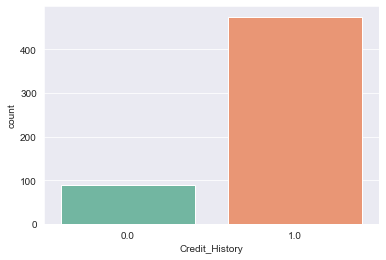

In [105]:
sns.countplot(x='Credit_History', data=df, palette = 'Set2')

In [106]:
train_data = df.copy()
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)  #the index of the maximum value
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].median()[0], inplace=True) # Mode
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [107]:
#Check missing values
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

In [109]:
train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

In [110]:
x = train_data.iloc[:,1:12]
y = train_data.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1234)

In [111]:
#Preview data information
df.info()
df.isnull().sum()

train_data.info()
train_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Co

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [112]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)

C:\Users\Hazem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [113]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [114]:
yes_no_lable = {"Y":1,"N":0}
#expected_y_num
#predicted_y_num
print(classification_report(expected_y, predicted_y))
print(confusion_matrix(expected_y, predicted_y))
print(accuracy_score(expected_y, predicted_y))
msqerr = mean_squared_error(expected_y, predicted_y)

              precision    recall  f1-score   support

           N       0.70      0.67      0.68        39
           Y       0.85      0.87      0.86        84

    accuracy                           0.80       123
   macro avg       0.78      0.77      0.77       123
weighted avg       0.80      0.80      0.80       123

[[26 13]
 [11 73]]
0.8048780487804879


ValueError: could not convert string to float: 'Y'